# Electric Vehicle Analytics Dataset.

The transition to electric mobility is emerging as a major challenge for the 21st century, both in terms of the environment and energy. Range is now one of the most decisive criteria for consumers and car manufacturers. It depends on many factors such as battery capacity, engine power, vehicle weight, and conditions of use.

In this project, we are using the “Electric Vehicle Analytics” dataset available on Kaggle.
This dataset includes various technical and descriptive characteristics of electric vehicles sold worldwide, such as brand, model, battery capacity, power, maximum speed, and charging type.

The objective of this study is to model and predict the range of an electric vehicle based on its technical characteristics. Before proceeding to the modeling phase, an in-depth exploratory data analysis (EDA) will be conducted to understand the structure of the dataset, detect relevant correlations, and prepare the data for machine learning.

This work will ultimately enable us to identify the variables that have the greatest impact on range, assess data quality, and build a reliable predictive model for estimating the energy performance of electric vehicles.


The dataset used in this project contains a total of 3,001 rows, 3,000 of which correspond to electric vehicles. The last row appears to be a summary or out-of-context entry and will eventually be excluded from the analysis.

It has 25 columns describing the technical, economic, and environmental characteristics of the vehicles. These variables cover a wide range of information, from battery power and capacity to maintenance costs and resale value.

The main information available includes:

Vehicle identification, through the variables Vehicle_ID, Make, Model, and Year, which specify the unique identifier, manufacturer, model, and year of production, respectively.

Geographical and functional characteristics, with Region and Vehicle_Type, indicating the area of use and type of vehicle (SUV, sedan, city car, etc.).

Battery-related data, which is essential for our study: Battery_Capacity_kWh, Battery_Health_%, Charging_Power_kW, Charging_Time_hr, and Charge_Cycles, which provide information on capacity, condition, charging power and time, and the number of charging cycles completed.

Energy and dynamic performance, including Range_km (range in kilometers, target variable), Energy_Consumption_kWh_per_100km, Mileage_km, Avg_Speed_kmh, Max_Speed_kmh, and Acceleration_0_100_kmh_sec. These parameters directly reflect the overall performance of the vehicle and its energy consumption.

Conditions of use, such as Temperature_C and Usage_Type (personal, commercial, fleet) which may influence wear and tear and range.

Economic and environmental aspects, with CO2_Saved_tons, Maintenance_Cost_USD, Insurance_Cost_USD, Electricity_Cost_USD_per_kWh, Monthly_Charging_Cost_USD, and Resale_Value_USD, allowing the overall cost and environmental benefits associated with each vehicle to be assessed.


Using our knowledge, we can identify several relevant criteria that influence the range of electric vehicles before conducting any analysis. In general, the latest models tend to have a longer range, as technological advances enable better energy management and optimized performance.

In addition, the type of vehicle also plays an important role: an SUV generally has a less favorable aerodynamic coefficient than a sedan, which translates into higher fuel consumption and therefore reduced range.

From a technical standpoint, a higher-capacity battery logically leads to greater range. However, this relationship also depends on the overall efficiency of the vehicle, i.e., its ability to consume available energy efficiently.

Finally, as with phone batteries, a high number of charge cycles leads to gradual battery degradation, which directly affects range. Similarly, high mileage can indicate battery wear, although this effect varies depending on how the vehicle is used (short trips with frequent recharging or long trips with less frequent recharging). The Battery_Health_% column will therefore allow you to assess the health of the battery and analyze its impact on range.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.exceptions import ConvergenceWarning
import warnings

### 1. Descriptive Analysis ###
Data loaded successfully!
DataFrame dimensions: (3000, 25)

--- General Information ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 25 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Vehicle_ID                        3000 non-null   int64  
 1   Make                              3000 non-null   object 
 2   Model                             3000 non-null   object 
 3   Year                              3000 non-null   int64  
 4   Region                            3000 non-null   object 
 5   Vehicle_Type                      3000 non-null   object 
 6   Battery_Capacity_kWh              3000 non-null   float64
 7   Battery_Health_%                  3000 non-null   float64
 8   Range_km                          3000 non-null   int64  
 9   Charging_Power_kW                 3000 non-null   float64
 10  Charging_Tim

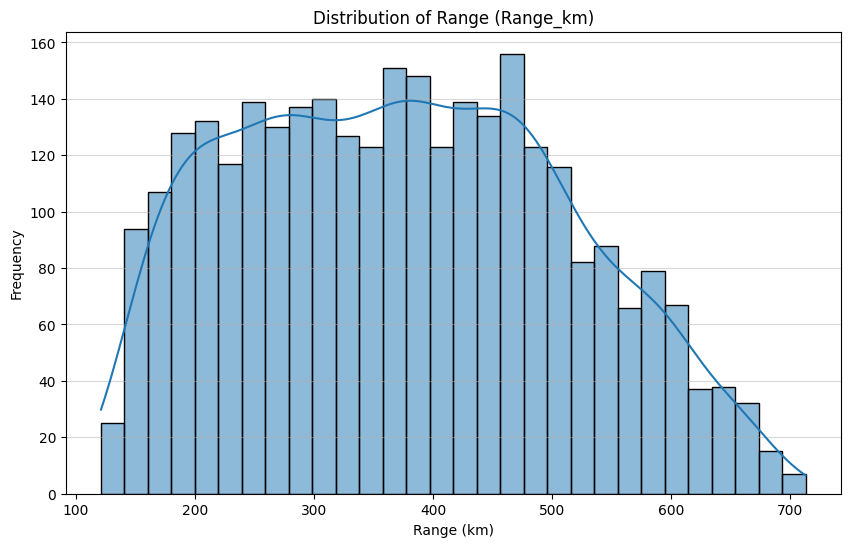


--- Visualization: Battery Capacity (kWh) Distribution ---


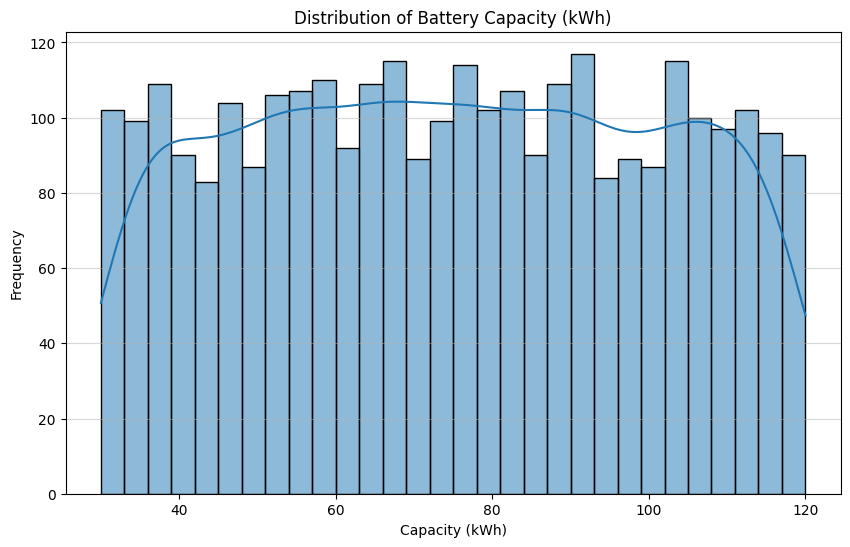


--- Visualization: Categorical Variables (Examples) ---


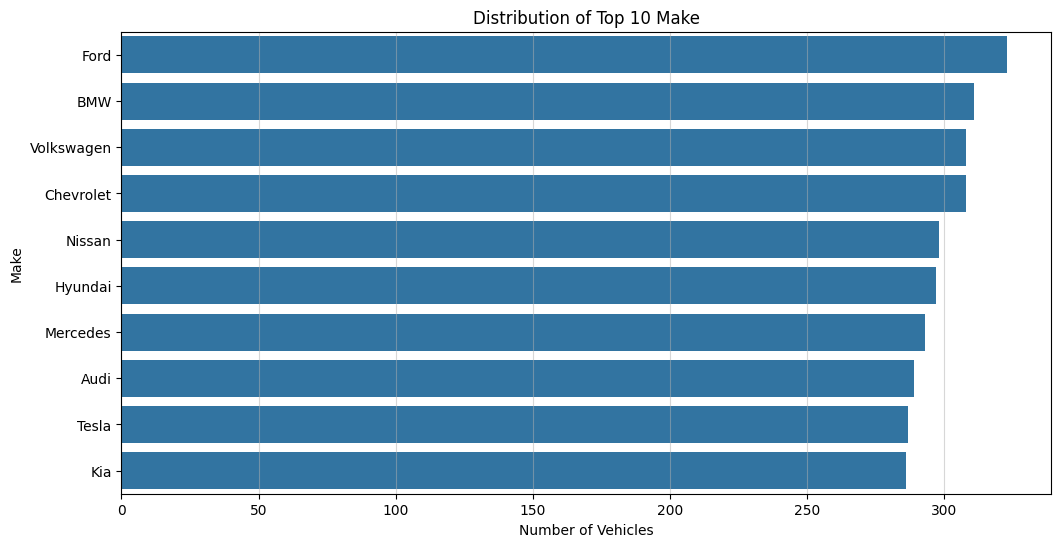


Top 10 counts for Make:
Make
Ford          323
BMW           311
Volkswagen    308
Chevrolet     308
Nissan        298
Hyundai       297
Mercedes      293
Audi          289
Tesla         287
Kia           286
Name: count, dtype: int64


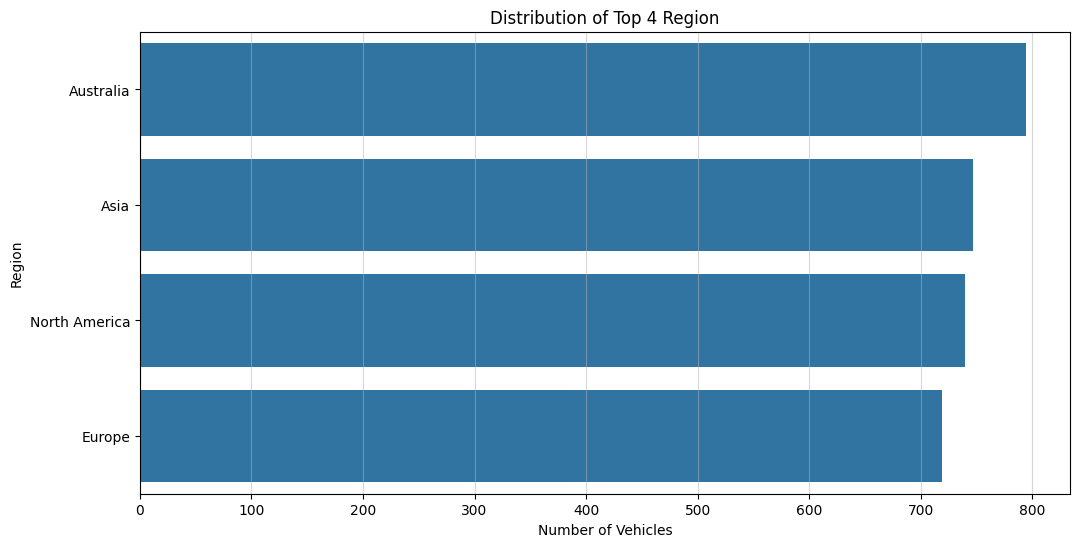


Top 4 counts for Region:
Region
Australia        794
Asia             747
North America    740
Europe           719
Name: count, dtype: int64


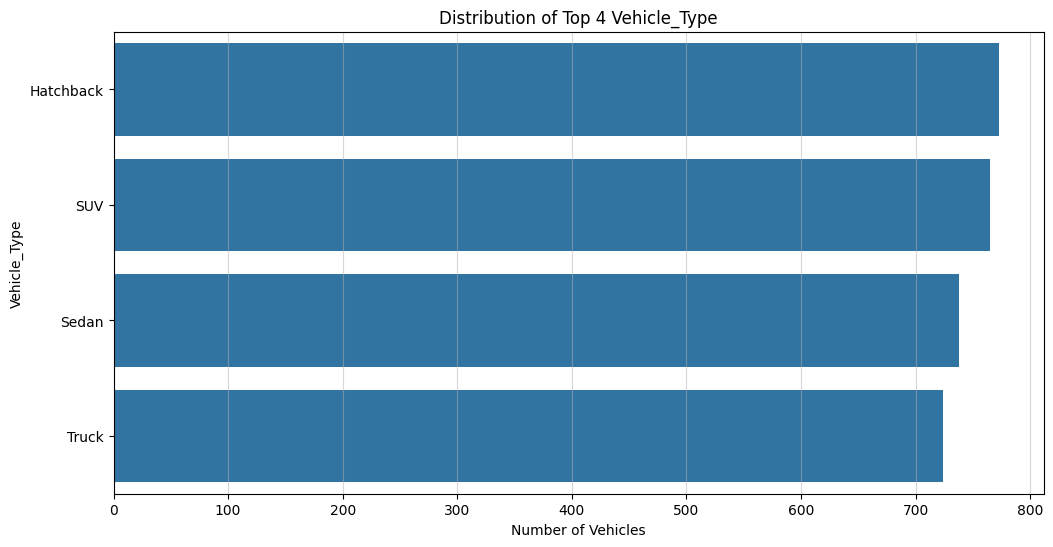


Top 4 counts for Vehicle_Type:
Vehicle_Type
Hatchback    773
SUV          765
Sedan        738
Truck        724
Name: count, dtype: int64


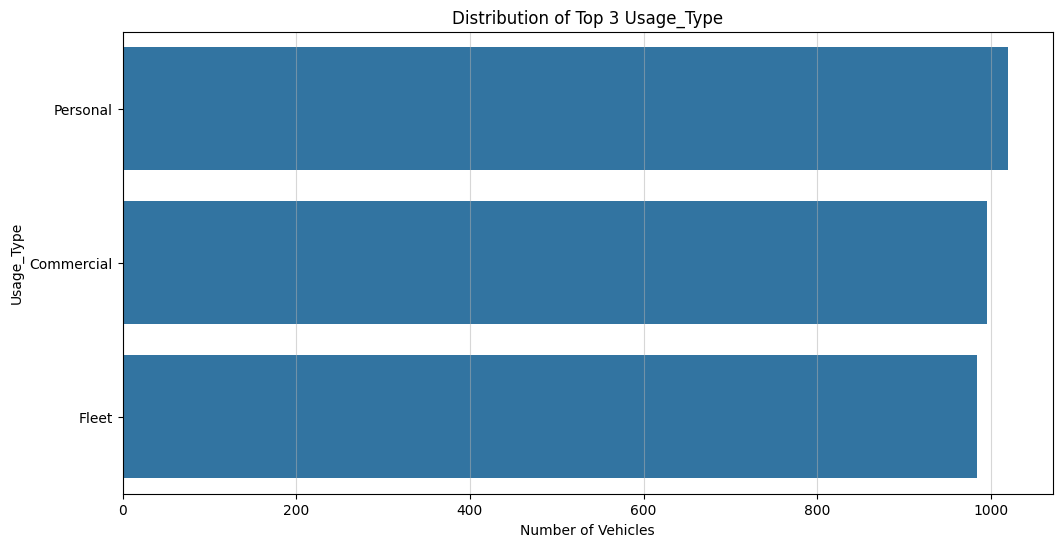


Top 3 counts for Usage_Type:
Usage_Type
Personal      1020
Commercial     996
Fleet          984
Name: count, dtype: int64

--- Visualization: Correlation Matrix (Numerical) ---


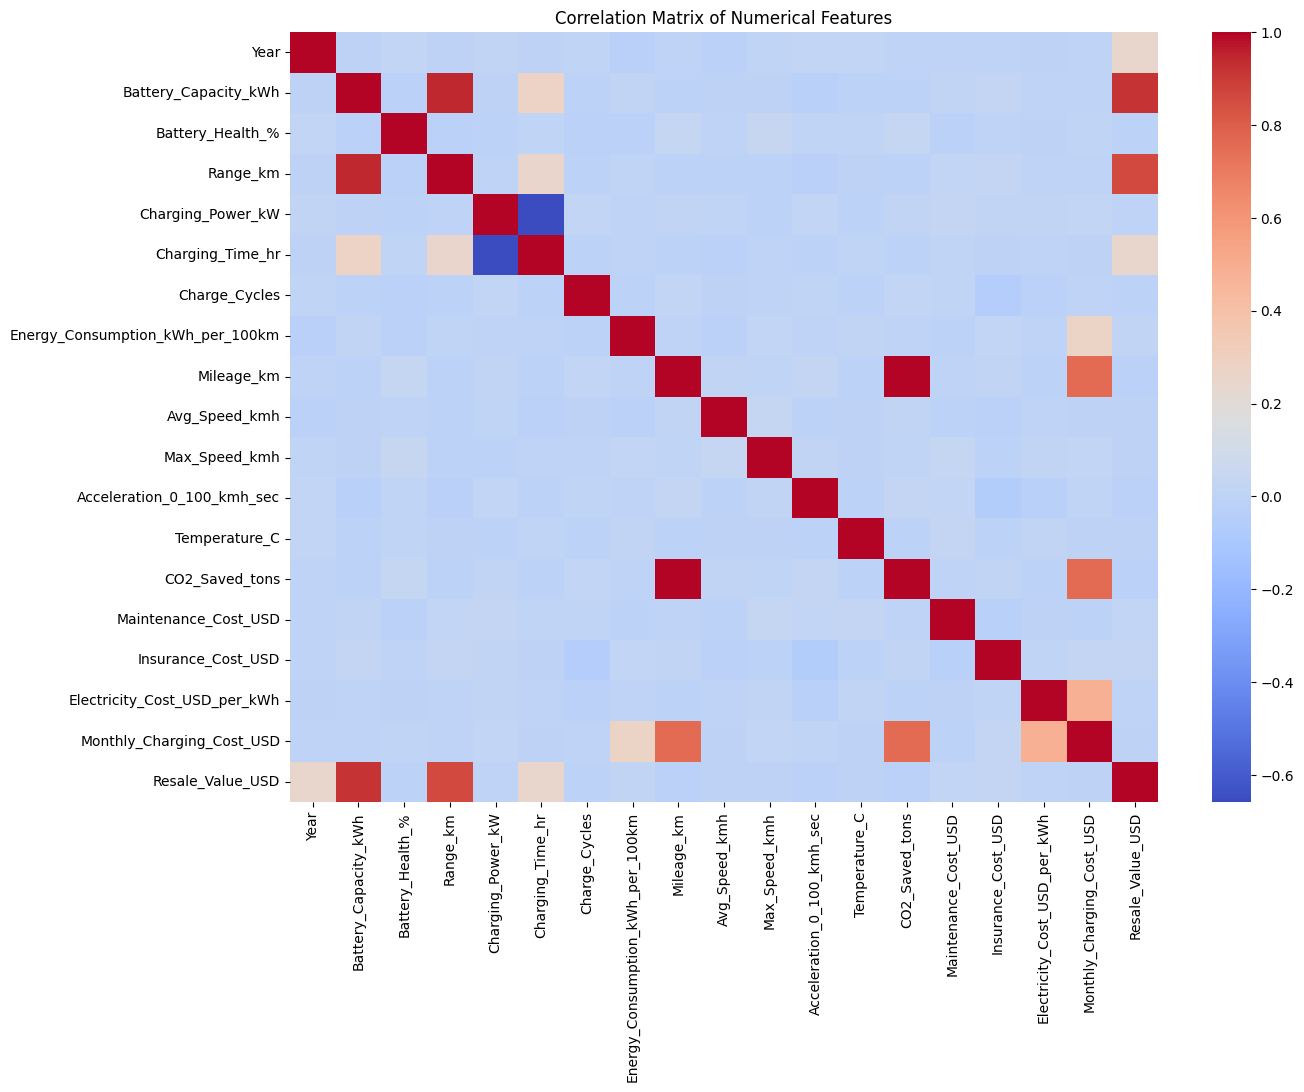


--- Correlations with Range_km (Sorted) ---
Range_km                            1.000000
Battery_Capacity_kWh                0.943628
Resale_Value_USD                    0.861199
Charging_Time_hr                    0.249630
Insurance_Cost_USD                  0.027761
Maintenance_Cost_USD                0.019290
Energy_Consumption_kWh_per_100km    0.008789
Electricity_Cost_USD_per_kWh        0.002061
Charging_Power_kW                   0.001574
Monthly_Charging_Cost_USD           0.000528
Year                               -0.004536
Temperature_C                      -0.010338
Mileage_km                         -0.011156
CO2_Saved_tons                     -0.011159
Avg_Speed_kmh                      -0.011951
Max_Speed_kmh                      -0.014198
Charge_Cycles                      -0.015847
Battery_Health_%                   -0.018351
Acceleration_0_100_kmh_sec         -0.029473
Name: Range_km, dtype: float64


In [15]:
print("### 1. Descriptive Analysis ###")

try:
    df = pd.read_csv('electric_vehicle_analytics.csv', delimiter=';')
    print("Data loaded successfully!")
    df.columns = df.columns.str.strip() 
    print(f"DataFrame dimensions: {df.shape}")
    if 'Range_km' not in df.columns:
        print("ERROR: 'Range_km' column not found. Please check the CSV file.")
        exit()
except FileNotFoundError:
    print("Error: File 'electric_vehicle_analytics.csv' not found.")
    exit()

print("\n--- General Information ---")
df.info()

print("\n--- Descriptive Statistics (Numerical) ---")
numerical_cols_desc = df.select_dtypes(include=np.number).columns
print(df[numerical_cols_desc].describe())

print("\n--- Visualization: Range (Range_km) Distribution ---")
plt.figure(figsize=(10, 6))
sns.histplot(df['Range_km'], kde=True, bins=30) 
plt.title('Distribution of Range (Range_km)')
plt.xlabel('Range (km)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

print("\n--- Visualization: Battery Capacity (kWh) Distribution ---")
plt.figure(figsize=(10, 6))
sns.histplot(df['Battery_Capacity_kWh'], kde=True, bins=30)
plt.title('Distribution of Battery Capacity (kWh)')
plt.xlabel('Capacity (kWh)')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.5)
plt.show()

print("\n--- Visualization: Categorical Variables (Examples) ---")
categorical_cols_analyze = ['Make', 'Region', 'Vehicle_Type', 'Usage_Type']
for col in categorical_cols_analyze:
    if col in df.columns:
        plt.figure(figsize=(12, 6))
        
        # Determine the number of top categories to show (max 10, or fewer if less exist)
        top_n_requested = 10
        value_counts = df[col].value_counts()
        actual_n = min(top_n_requested, len(value_counts)) # Get the actual number displayed
        top_categories = value_counts.nlargest(actual_n).index
        
        sns.countplot(y=df[df[col].isin(top_categories)][col], order=top_categories)
        
        # Use actual_n in the title
        plt.title(f'Distribution of Top {actual_n} {col}') 
        
        plt.xlabel('Number of Vehicles')
        plt.ylabel(col)
        plt.grid(axis='x', alpha=0.5)
        plt.show()
        
        # Use actual_n in the print statement
        print(f"\nTop {actual_n} counts for {col}:\n{value_counts.nlargest(actual_n)}") 
    else:
        print(f"Column '{col}' not found for analysis.")

print("\n--- Visualization: Correlation Matrix (Numerical) ---")
plt.figure(figsize=(14, 10))
numeric_df_for_corr = df.select_dtypes(include=np.number).drop('Vehicle_ID', axis=1, errors='ignore')
correlation_matrix = numeric_df_for_corr.corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm') 
plt.title('Correlation Matrix of Numerical Features')
plt.show()

print("\n--- Correlations with Range_km (Sorted) ---")
print(correlation_matrix['Range_km'].sort_values(ascending=False))

In [16]:
print("\n### 2. Pre-processing ###")

if 'df' not in locals():
    print("DataFrame 'df' not found. Please run the descriptive analysis block first.")
    exit()

X = df.drop('Range_km', axis=1)
y = df['Range_km']

numerical_features = X.select_dtypes(include=np.number).drop('Vehicle_ID', axis=1, errors='ignore').columns.tolist()
categorical_features = ['Make', 'Region', 'Vehicle_Type', 'Usage_Type']

print(f"Selected numerical features: {numerical_features}")
print(f"Selected categorical features: {categorical_features}")

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore', sparse_output=False), categorical_features) # sparse_output=False might help
    ],
    remainder='drop' 
)

print("\nPreprocessor pipeline 'preprocessor' defined.")

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"\nData split:")
print(f" - X_train size: {X_train.shape}")
print(f" - X_test size: {X_test.shape}")
print(f" - y_train size: {y_train.shape}")
print(f" - y_test size: {y_test.shape}")


X_train_processed = preprocessor.fit_transform(X_train)
print(f"\nDimensions of X_train after pre-processing: {X_train_processed.shape}")


### 2. Pre-processing ###
Selected numerical features: ['Year', 'Battery_Capacity_kWh', 'Battery_Health_%', 'Charging_Power_kW', 'Charging_Time_hr', 'Charge_Cycles', 'Energy_Consumption_kWh_per_100km', 'Mileage_km', 'Avg_Speed_kmh', 'Max_Speed_kmh', 'Acceleration_0_100_kmh_sec', 'Temperature_C', 'CO2_Saved_tons', 'Maintenance_Cost_USD', 'Insurance_Cost_USD', 'Electricity_Cost_USD_per_kWh', 'Monthly_Charging_Cost_USD', 'Resale_Value_USD']
Selected categorical features: ['Make', 'Region', 'Vehicle_Type', 'Usage_Type']

Preprocessor pipeline 'preprocessor' defined.

Data split:
 - X_train size: (2400, 24)
 - X_test size: (600, 24)
 - y_train size: (2400,)
 - y_test size: (600,)

Dimensions of X_train after pre-processing: (2400, 39)


In [12]:
print("\n### 3. Problem Formalization ###")
print("------------------------------------")
print("1. Problem Type:")
print("   - Supervised Regression.")
print("\n2. Main Objective:")
print("   - Predict the range ('Range_km') of an electric vehicle based on its characteristics.")
print("   - Identify the most influential features affecting the range.")
print("\n3. Input Data (Features X):")
print("   - Numerical variables: Battery_Capacity_kWh, Battery_Health_%, Charging_Power_kW, etc.")
print("   - Categorical variables: Make, Region, Vehicle_Type, Usage_Type.")
print("   - Note: These variables require pre-processing (scaling, encoding).")
print("\n4. Output Data (Target y):")
print("   - 'Range_km': Continuous numerical variable representing the range in kilometers.")
print("\n5. Primary Evaluation Metrics:")
print("   - RMSE (Root Mean Squared Error): To penalize larger errors more and have a metric in the target unit (km).")
print("   - MAE (Mean Absolute Error): For direct interpretation of the average error in km.")
print("   - R² (Coefficient of Determination): To evaluate the proportion of the range variance explained by the model.")
print("------------------------------------")


### 3. Problem Formalization ###
------------------------------------
1. Problem Type:
   - Supervised Regression.

2. Main Objective:
   - Predict the range ('Range_km') of an electric vehicle based on its characteristics.
   - Identify the most influential features affecting the range.

3. Input Data (Features X):
   - Numerical variables: Battery_Capacity_kWh, Battery_Health_%, Charging_Power_kW, etc.
   - Categorical variables: Make, Region, Vehicle_Type, Usage_Type.
   - Note: These variables require pre-processing (scaling, encoding).

4. Output Data (Target y):
   - 'Range_km': Continuous numerical variable representing the range in kilometers.

5. Primary Evaluation Metrics:
   - RMSE (Root Mean Squared Error): To penalize larger errors more and have a metric in the target unit (km).
   - MAE (Mean Absolute Error): For direct interpretation of the average error in km.
   - R² (Coefficient of Determination): To evaluate the proportion of the range variance explained by the mode

In [ ]:
warnings.filterwarnings("ignore", category=ConvergenceWarning)

print("\n### 4. Baseline Model ###")

if 'preprocessor' not in locals() or 'X_train' not in locals():
    print("Required variables not defined. Please run the previous blocks.")
    exit()

print("\n--- Selected Baseline: Linear Regression ---")

lr_baseline_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression(n_jobs=-1)) 
])

print("\n--- Training the Baseline Pipeline ---")
lr_baseline_pipeline.fit(X_train, y_train)
print("Training complete.")

print("\n--- Baseline Evaluation ---")
y_pred_baseline = lr_baseline_pipeline.predict(X_test)

mae_baseline = mean_absolute_error(y_test, y_pred_baseline)
rmse_baseline = np.sqrt(mean_squared_error(y_test, y_pred_baseline))
r2_baseline = r2_score(y_test, y_pred_baseline)

print(f"Baseline Linear Regression MAE: {mae_baseline:.2f} km")
print(f"Baseline Linear Regression RMSE: {rmse_baseline:.2f} km")
print(f"Baseline Linear Regression R²: {r2_baseline:.3f}")
print("\n--- End of Baseline Implementation ---")


### 4. Baseline Model ###

--- Selected Baseline: Linear Regression ---

--- Training the Baseline Pipeline ---
Training complete.

--- Baseline Evaluation ---
Baseline Linear Regression MAE: 38.60 km
Baseline Linear Regression RMSE: 47.58 km
Baseline Linear Regression R²: 0.876

--- End of Baseline Implementation ---
